##### 거듭 제곱 변환

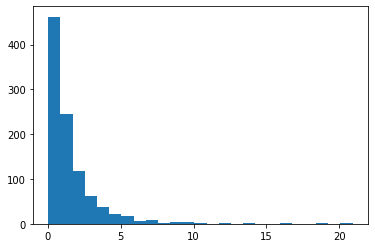

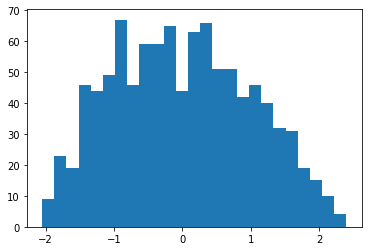

In [1]:
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

# 테스트 세트
data = randn(1000)
# 데이터 분포에 왜곡 추가
data = exp(data)

# 왜곡이 있는 원시 데이터
pyplot.hist(data, bins=25)
pyplot.show()

# 행렬 행태로 변환
data = data.reshape((len(data), 1))

# 거듭제곱 변환
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)

# 변환된 데이터
pyplot.hist(data_trans, bins=25)
pyplot.show()

##### 소나 데이터

```
정확도
 - 79.7%
```

In [2]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# 소나 데이터
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
# 데이터 세트 로드
dataset = read_csv(url, header=None)

# 데이터 분할
data = dataset.values
X, y = data[:, :-1], data[:, -1]

# 데이터 타입 변환
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# 모델 평가
model = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# 평균과 표준편차 확인
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


##### Yeo-Johnson

```
정확도
 - 80.8%
```

In [9]:
# evaluate knn on the box-cox sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# 소나 데이터
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
# 데이터 세트 로드
dataset = read_csv(url, header=None)

# 데이터 분할
data = dataset.values
X, y = data[:, :-1], data[:, -1]

# 데이터 변환
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# 거듭 제곱
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('p', power), ('m', model)])

# 모델 평가
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# 평균과 표준편차 확인
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.808 (0.082)


##### Yeo-Johnson

```
표준화 적용
 - 81.6%
```

In [10]:
# evaluate knn on the box-cox sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# 소나 데이터
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
# 데이터 세트 로드
dataset = read_csv(url, header=None)

# 데이터 분할
data = dataset.values
X, y = data[:, :-1], data[:, -1]

# 데이터 변환
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# 표준화
scaler = StandardScaler()
# 거듭 제곱
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler), ('p', power), ('m', model)])

# 모델 평가
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# 평균과 표준편차 확인
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.077)


##### Box-Cox

```
정규화
 - 81.1%
```

In [7]:
# evaluate knn on the box-cox sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# 소나 데이터
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
# 데이터 세트 로드
dataset = read_csv(url, header=None)

# 데이터 분할
data = dataset.values
X, y = data[:, :-1], data[:, -1]

# 데이터 변환
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# 정규화
scaler = MinMaxScaler(feature_range=(1, 2))
# 거듭 제곱
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler), ('p', power), ('m', model)])

# 모델 평가
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# 평균과 표준편차 확인
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.811 (0.085)
